In [95]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import matplotlib
from matplotlib import pyplot
from IPython.display import clear_output

In [2]:
#NN distinguishing plot of a Gaussian from Cauchy distribution

#function generates a random batch of Gaussin or Cauchy plots with random parameters
def input_data(Nprob,Ncopy=1):
    is_gauss=[True if np.random.uniform(0,1.0)<0.5 else False for i in range(Ncopy)]
    out=np.array([[1.0,0.0] if is_gauss[i]==True else [0.0,1.0] for i in range(Ncopy)])
    x=np.linspace(-10.0,10.0,Nprob)
    x0=np.transpose(np.random.uniform(-10.0,10.0,Ncopy))
    amp=np.transpose(np.random.uniform(0,10.0,Ncopy))
    std=np.transpose(np.random.uniform(0,5.0,Ncopy))
    #print("gauss:",is_gauss,"x0=",x0,"amp=",amp,"std=",std)
    y=np.array([amp[i]*np.exp(-((x-x0[i])/std[i])**2)*is_gauss[i]+(1.0-is_gauss[i])*amp[i]/(1+((x-x0[i])/std[i])**2) for i in range(Ncopy)])
    noise=np.random.normal(0,1.0,(Ncopy,Nprob))
    return y+noise,out

#result,output=input_data(100,10)
#fig,plot=pyplot.subplots()
#for i in range(10):
#    plot.plot(result[i])
#pyplot.show()    

#defining NN
Nprob=100
network=Sequential()
network.add(Dense(50,input_shape=(Nprob,),activation='relu'))
network.add(Dense(50,activation='relu'))
network.add(Dense(2,activation='softmax'))
network.compile(loss='categorical_crossentropy',optimizer='adam')

#teaching function
def teach_network(model,Nsteps,Nbatch,Nprob):
    cost=[None]*Nsteps
    yin,yout=input_data(Nprob,Nbatch)
    #print(yin,yout)
    for it in range(Nsteps):
        cost[it]=model.train_on_batch(yin,yout)
        print(f"{it/Nsteps:.0%}"," cost=",cost[it],end="            \r")
    print("\nteaching finished")

teach_network(network,10000,200,Nprob)



100%  cost= 5.6624404720651e-08               
teaching finished


In [3]:
#testing the accuracy of results
test_in,test_out=input_data(Nprob,100)
result=network.predict_on_batch(test_in)
result2=[[1.0,0] if result[i][0]>result[i][1] else [0,1.0] for i in range(100)]
#print(result)
print((test_out*result).sum())


69.32665699471538


In [120]:
#NN distinguishing circles from squares

#function generating random batch of circles and squares with labels
def input_data2D(Nprob,Ncopy=1):
    is_circle=np.array([[True] if np.random.uniform(0,1)<0.5 else [False] for i in range(Ncopy)])
    out=np.array([[1.0,0] if el[0]==True else [0,1.0] for el in is_circle])
    x0=np.random.uniform(-1.0,1.0,Ncopy)
    y0=np.random.uniform(-1.0,1.0,Ncopy)
    r=np.random.uniform(0.3,1.0,Ncopy)
    x=np.linspace(-1.0,1.0,Nprob)
    y=np.linspace(-1.0,1.0,Nprob)
    circle=np.array([[1.0 if (x[j]-x0[n])**2+(y[i]-y0[n])**2<r[n]**2 else 0 for i in range(Nprob) for j in range(Nprob)] for n in range(Ncopy)])
    square=np.array([[1.0 if (x0[n]-r[n]<x[j]<x0[n]+r[n])*(y0[n]-r[n]<y[i]<y0[n]+r[n]) else 0 for i in range(Nprob) for j in range(Nprob)] for n in range(Ncopy)])
    z=is_circle*circle+(1.0-is_circle)*square
    return z, out

def test_fig():
    Nprob=20
    test,out=input_data2D(Nprob,2)
    fig,plot=pyplot.subplots()
    tab=np.linspace(-1.0,1.0,Nprob)
    x,y=np.meshgrid(tab,tab)
    z=np.reshape(test[0],(-1,Nprob))
    plot.pcolormesh(x,y,z)
    plot.set_box_aspect(1)
    pyplot.show()


        
    

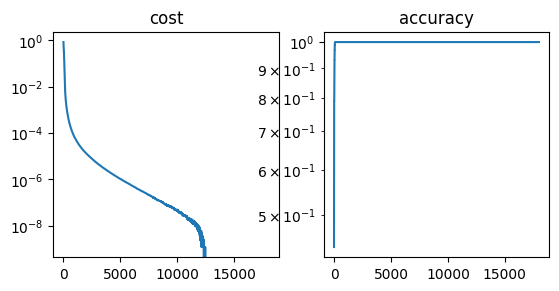

100%  cost= 0.0            
teaching finished


In [134]:
#defining NN
Nprob2=20
network2=Sequential()
network2.add(Dense(30,input_shape=(Nprob2**2,),activation='relu'))
network2.add(Dense(30,activation='relu'))
network2.add(Dense(2,activation='softmax'))

network2.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['categorical_accuracy'])

#teaching NN
def teach_network2(model,Nsteps,Nbatch,Nprob):
    cost=[None]*Nsteps
    accuracy=[None]*Nsteps
    yin,yout=input_data2D(Nprob,Nbatch)
    #print(yin,yout)
    
    for it in range(Nsteps):
        cost[it],accuracy[it]=model.train_on_batch(yin,yout)
        print(f"{it/Nsteps:.0%}"," cost=",cost[it],end="            \r")
        if it%int(Nsteps/10.0)==0:
            clear_output(wait=True)
            fig=pyplot.figure()
            plt=fig.add_gridspec(1,2)
            plot=plt.subplots()
            plot[0].set_yscale('log')
            plot[1].set_yscale('log')
            plot[0].plot(cost,label="cost")
            plot[1].plot(accuracy,label="accuracy")
            plot[0].set_title("cost")
            plot[1].set_title("accuracy")
            plot[0].set_box_aspect(1)
            plot[1].set_box_aspect(1)
            pyplot.show()
    print("\nteaching finished")

teach_network2(network2,20000,100,Nprob2)


In [135]:
#testing accuracy
test2_in,test2_out=input_data2D(Nprob2,100)
result2=network2.predict_on_batch(test2_in)
refine=np.array([[1.0,0] if el[0]>el[1] else [0,1.0] for el in result2])
print((refine*test2_out).sum())

54.0


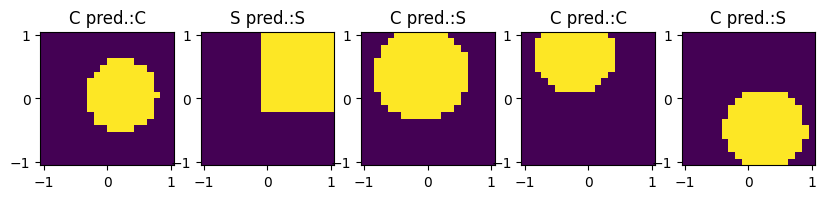

In [136]:
#plotting results
def lets_see(model,Ntest,Nprob):
    test,out=input_data2D(Nprob,Ntest)
    result=model.predict_on_batch(test)    
    fig=pyplot.figure(figsize=(Ntest*2,2))
    plot=fig.add_gridspec(1,Ntest)
    plt=plot.subplots()
    
    tab=np.linspace(-1.0,1.0,Nprob)
    x,y=np.meshgrid(tab,tab)
    for n in range(Ntest):
        z=np.reshape(test[n],(-1,Nprob))
        plt[n].pcolormesh(x,y,z)
        plt[n].set_box_aspect(1)
        plt[n].set_title(("C" if out[n,0]==1 else "S")+" pred.:"+("C" if result[n,0]>result[n,1] else "S"))
        
    pyplot.show()

lets_see(network2,5,Nprob2)